<a href="https://colab.research.google.com/github/dennismathewjose/Data-Mining-IE7275/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

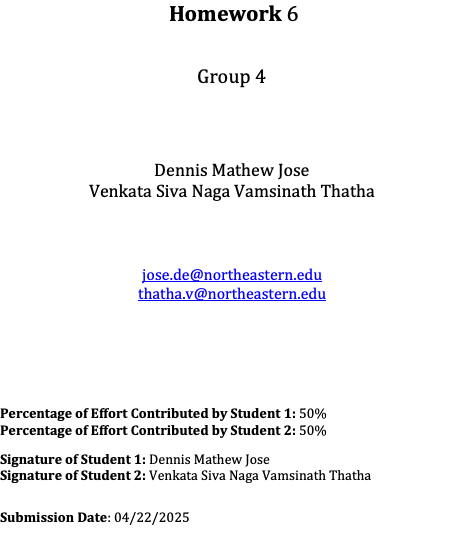

# Homework 6

**Before you start:** Read Chapter 10 Logistic Regression and Chapter 11 Neural Networks in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are always welcomed.

## Part 1: Logistic Regression

### Problem 1 - Financial Condition of Banks##

The file **Banks.csv** includes data on a sample of 20 banks.

The “Financial Condition” column records the judgment of an expert on the financial condition of each bank. This response variable takes one of two possible values—weak or strong—according to the financial condition of the bank.

The predictors are two ratios used in the financial analysis of banks: TotLns&Lses/Assets is the ratio of total loans and leases to total assets and TotExp/Assets is the ratio of total expenses to total assets.

The target is to classify the financial condition of a new bank using the two ratios.


In [ ]:
# Load the required packages
import pandas as pd
import numpy as np

import statsmodels.api as sm

In [ ]:
# Import the dataset
from google.colab import files
file = files.upload()
df = pd.read_csv("Banks.csv")
df.head()

Saving Banks.csv to Banks (1).csv


,Obs,Financial Condition,TotCap/Assets,TotExp/Assets,TotLns&Lses/Assets
0,1,1,9.7,0.12,0.65
1,2,1,1.0,0.11,0.62
2,3,1,6.9,0.09,1.02
3,4,1,5.8,0.10,0.67
4,5,1,4.3,0.11,0.69


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Obs                  20 non-null     int64  
 1   Financial Condition  20 non-null     int64  
 2   TotCap/Assets        20 non-null     float64
 3   TotExp/Assets        20 non-null     float64
 4   TotLns&Lses/Assets   20 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 932.0 bytes


In [ ]:
df.isnull().sum()

,0
Obs,0
Financial Condition,0
TotCap/Assets,0
TotExp/Assets,0
TotLns&Lses/Assets,0



**TODO 1**

Run a logistic regression model (on the entire dataset) that models the status of a bank as a function of the two financial measures provided.

Specify the success class as weak (this is similar to creating a dummy that is 1 for financially weak banks and 0 otherwise), and use the default cutoff value of 0.5.


In [ ]:
#Define the features
X = df[['TotExp/Assets','TotLns&Lses/Assets']]

#Add the weight
X = sm.add_constant(X)

#define the output variable
y = df['Financial Condition']

In [ ]:
#fit the logistic regression model
logistic_regression_model = sm.Logit(y, X)
result = logistic_regression_model.fit()

#print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.328688
         Iterations 8
                            Logit Regression Results                           
Dep. Variable:     Financial Condition   No. Observations:                   20
Model:                           Logit   Df Residuals:                       17
Method:                            MLE   Df Model:                            2
Date:                 Thu, 17 Apr 2025   Pseudo R-squ.:                  0.5258
Time:                         21:00:53   Log-Likelihood:                -6.5738
converged:                        True   LL-Null:                       -13.863
Covariance Type:             nonrobust   LLR p-value:                 0.0006829
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -14.7210      6.675     -2.205      0.027     -27.804      -1.6

In [ ]:
df['Predicted probabilities'] = result.predict(X)

In [ ]:
df['Predicted Class'] = (df['Predicted probabilities'] >= 0.5).astype(int)


**TODO 2**

Write the estimated equation that associates the financial condition of a bank with its two predictors in three formats:

a. The logit as a function of the predictors

b. The odds as a function of the predictors

c. The probability as a function of the predictors


### From the logistic regression summary
\begin{equation}
\beta_0 = -14.7210\
\beta_1 = 89.8339\
\beta_2 = 8.3713\
\end{equation}

### a. The logit as a function of predictors

from the logistic regression summary we got

\begin{equation}
\text{logit}(p) = \ln\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2
\end{equation}

substituting the values  for\begin{equation}x_1\cdot x_2\cdot\beta_0 \cdot\beta_1 \cdot\beta_2\end{equation}

we get the equaiton as

\begin{equation}
\text{logit}(p) = \ln\left(\frac{p}{1 - p}\right) = -14.7210 + 89.8339 \cdot \text{TotExp/Assets} + 8.3713 \cdot \text{TotLns\&Lses/Assets}
\end{equation}


### b.The odds as a function of predictors
\begin{equation}
\frac{p}{1 - p} = \exp\left(\beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2\right)
\end{equation}

After substiution

\begin{equation}
\frac{p}{1 - p} = \exp\left(-14.7210 + 89.8339 \cdot \text{TotExp/Assets} + 8.3713 \cdot \text{TotLns\&Lses/Assets}\right)
\end{equation}


### c. The probability as a function of predictors



\begin{equation}
p = \frac{1}{1 + \exp\left[-(\beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2)\right]}
\end{equation}

After Substitution

\begin{equation}
p = \frac{1}{1 + \exp\left[-(-14.7210 + 89.8339 \cdot \text{TotExp/Assets} + 8.3713 \cdot \text{TotLns\&Lses/Assets})\right]}
\end{equation}


**TODO 3**

Consider a new bank whose total loans and leases/assets ratio = 0.6 and total expenses/assets ratio = 0.11.

From your logistic regression model, estimate the following four quantities for this bank:

the logit, the odds, the probability of being financially weak, and the classification of the bank (use cutoff = 0.5).

### estimation from the logit
\begin{equation}
\text{logit}(p) = \ln\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2
\end{equation}

Substituting the values

\begin{equation}
\text{logit}(p) = −14.7210+89.8339⋅0.11+8.3713⋅0.60 = 0.1835
\end{equation}

### estimation of odds

\begin{equation}
\frac{p}{1 - p} = \exp\left(\beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2\right)
\end{equation}

After substitution

\begin{equation}
\frac{p}{1-p} = \exp\left(logit\right) = \exp\left(0.1835\right) = 1.2015
\end{equation}

### Probability Calculation

\begin{equation}
p = \frac{1}{1 + \exp\left[-(\beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2)\right]} = \frac{1}{1 + exp(-logit)}
\end{equation}

After substitution

\begin{equation}
 P = \frac{1}{1 + exp(-logit)} = \frac{1}{1+exp(-0.1835)} = 0.5457
\end{equation}

#### Using default cut-off which is 0.5 and the Probability value of 0.5457 which is greater than the cut-off we can classify it as financially weak


**TODO 4**

We use a cutoff value of 0.5 to classify a record based on propensity.

Instead, if we want to classify the record using the odds or logit, what value should we take as a cutoff?

### Solution
#### Based on Logit
\begin{equation}
\text{logit}(p) = \ln\left(\frac{p}{1 - p}\right)
\end{equation}

for p = 0.5
\begin{equation}
\text{logit}(0.5) = \ln\left(\frac{0.5}{1 - 0.5}\right) = 0
\end{equation}

Cut-off logit = 0
- If logit > 0 → classify as "weak"
- If logit < 0 → classify as "strong"

#### Based on Odds

\begin{equation}
odds = \frac{p}{1 - p} = \frac{0.5}{1-0.5} = 1\
\end{equation}

Cutoff Odds = 1
- If odds > 1 → classify as "weak"
- If odds < 1 → classify as "strong"

**TODO 5**

When a bank with in poor financial condition is misclassified as financially strong, the misclassification cost is much higher than a financially strong bank misclassified as weak.

To minimize the expected cost of misclassification, should the cutoff value for classification (which is currently at 0.5) be increased or decreased?

### Solution

#### Objective: You want to minimize the expected cost of misclassification.

That means:

- To catch more truly weak banks, one must increase sensitivity (recall for the weak class).

In order to achieve this the cut-off value should be decreased.
Based on the analysis when the cut-off is decreased
- At a lower cutoff (e.g., 0.3), one classify more banks as "weak".

- This reduces the chance of missing a truly weak bank (i.e., fewer false negatives).

- Yes, one may wrongly classify a few strong banks as weak, but that’s less costly in the scenario.

### Problem 2 - Identifying Good System Administrators##

A management consultant is studying the roles played by experience and training in a system administrator’s ability to complete a set of tasks in a specified amount of time. In particular, the consultant is interested in discriminating between administrators who are able to complete given tasks within a specified time and those who are not.

Data are collected on the performance of 75 randomly selected administrators. They are stored in the file **SystemAdministrators.csv**.

The variable Experience measures months of full-time system administrator experience, while Training measures the number of relevant training credits. The outcome variable Completed is either Yes or No, according to whether or not the administrator completed the tasks.


In [ ]:
# Import the dataset
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from google.colab import files

# Upload the file to the current environment
uploaded = files.upload()


# Load the data
data = pd.read_csv('SystemAdministrators.csv')
data.head()

Saving SystemAdministrators.csv to SystemAdministrators (2).csv


,Experience,Training,Completed task
0,10.9,4,Yes
1,9.9,4,Yes
2,10.4,6,Yes
3,13.7,6,Yes
4,9.4,8,Yes


**TODO 1**

Run a logistic regression model with both predictors using the entire dataset as training data. Among those who completed the task, what is the percentage of administrators incorrectly classified as failing to complete the task?

In [ ]:
# Rename for convenience
df = data.rename(columns={'Completed task': 'Completed'})

# Prepare X and y
X = df[['Experience', 'Training']]
y = df['Completed'].map({'Yes': 1, 'No': 0})

#  Fit logistic regression
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)

# Predict and confusion matrix
y_pred = model.predict(X)
# The confusion_matrix function returns a 2x2 array for binary classification.
# We need to unpack it into 2 variables (or reshape it to access the 4 elements)
conf_matrix = confusion_matrix(y, y_pred) # Assign result to conf_matrix

[[tn, fp], [fn, tp]] = conf_matrix # Unpack values if necessary

print("Confusion Matrix:\n", conf_matrix)

#  Misclassification among completers (false negatives)
misclass_rate = fn / (fn + tp) * 100
print(f"Misclassification rate among those who completed: {misclass_rate:.2f}%")


Confusion Matrix:
 [[58  2]
 [ 5 10]]
Misclassification rate among those who completed: 33.33%


**TODO 2**

How much experience must be accumulated by a administrator with 4 years of training before his or her estimated probability of completing the task exceeds 0.5?

In [ ]:
#  Experience threshold for training=4 credits at P>0.5
coef = model.coef_[0]
intercept = model.intercept_[0]
training_level = 4
exp_thresh = - (intercept + coef[1] * training_level) / coef[0]
print(f"Experience needed for {training_level} years of training to exceed P=0.5: {exp_thresh:.2f} months")

Experience needed for 4 years of training to exceed P=0.5: 9.17 months
